# Generate plots from CSV files

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [50]:

window_type = "hann"
complexity = "Simple"
for window_type in ("rectangular", "hann", "blackman"):
    for complexity in ("Simple", "Complex"):
        path_to_results = "../Spectrogram Results/" + complexity + "/" + window_type + ".csv"

        df = pd.read_csv(path_to_results)

        plt.plot(df["0"], label='training loss')
        plt.plot(df["1"], label='validation loss')
        plt.ylim((0, 2))
        # plt.plot(df[""], label="who knows")
        plt.legend()
        plt.show()



SyntaxError: expected ':' (2628366646.py, line 3)

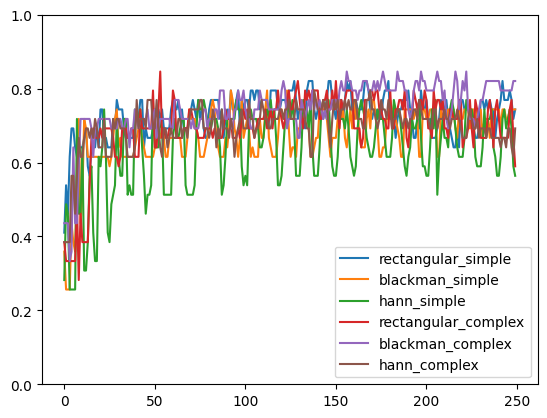

0.7692307692307693
0.7321937321937323
0.6752136752136751
0.6923076923076923
0.8005698005698005
0.6581196581196581


In [45]:
pathroot = "../Spectrogram Results"

Simple = "/Simple"
Complex  = "/Complex"

hann = "/hann.csv"
blackman = "/blackman.csv"
rectangular = "/rectangular.csv"

df1 = pd.read_csv(pathroot + Simple + rectangular)
df2 = pd.read_csv(pathroot + Simple + blackman)
df3 = pd.read_csv(pathroot + Simple + hann)

df4 = pd.read_csv(pathroot + Complex + rectangular)
df5 = pd.read_csv(pathroot + Complex + blackman)
df6 = pd.read_csv(pathroot + Complex + hann)

plt.plot(df1["2"], label="rectangular_simple")
plt.plot(df2["2"], label="blackman_simple")
plt.plot(df3["2"], label="hann_simple")

plt.plot(df4["2"], label="rectangular_complex")
plt.plot(df5["2"], label="blackman_complex")
plt.plot(df6["2"], label="hann_complex")

plt.ylim((0, 1))
plt.legend()
plt.show()


def last10avg(indf):

    out = np.mean(indf["2"][-10:-1])
    return out

for i in (df1, df2, df3, df4, df5, df6):
    print(last10avg(i))
